## Import Relevant Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Generation

In [10]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10,10, (observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# Solving with tensorflow

In [11]:
training_data = np.load('TF_intro.npz')

In [14]:
input_size = 2
output_size = 1

#             Dense - takes the inputs provided to the model and calculates the dot product of the inputs and the weights and adds the bias
#     also applies activation function (optional)
#             Kernel - group of weights
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(output_size,
                                            kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                            bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                         )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# model.compile(optimizer, loss) - configures the model for training
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Epoch - iteration over the full dataset
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 2s - loss: 29.7548 - 2s/epoch - 53ms/step
Epoch 2/100
32/32 - 0s - loss: 1.2807 - 100ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4192 - 97ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 0.4169 - 98ms/epoch - 3ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3587 - 96ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3725 - 98ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 0.4113 - 85ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3855 - 84ms/epoch - 3ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3904 - 83ms/epoch - 3ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3651 - 91ms/epoch - 3ms/step
Epoch 11/100
32/32 - 0s - loss: 0.4151 - 91ms/epoch - 3ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3804 - 98ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3937 - 86ms/epoch - 3ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3918 - 76ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.4198 - 84ms/epoch - 3ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3819 - 86ms/epoch - 3ms/step


## Extract weights and bias

In [15]:
model.layers[0].get_weights()

[array([[ 1.9934149],
        [-3.0095618]], dtype=float32),
 array([5.00777], dtype=float32)]

## Extract the outputs (make predictions)

In [16]:
# model.predict_on_batch(data) - calculates the outputs given inputs
model.predict_on_batch(training_data['inputs'])

array([[ 2.23759384e+01],
       [ 2.17201233e-01],
       [-2.96129913e+01],
       [ 2.39757347e+01],
       [-2.14919586e+01],
       [-7.79378462e+00],
       [ 2.55012684e+01],
       [ 4.38565397e+00],
       [ 6.69106960e-01],
       [ 1.78068390e+01],
       [ 5.74263048e+00],
       [ 2.12757645e+01],
       [ 4.24025917e+01],
       [-4.18942451e+01],
       [-3.96690178e+01],
       [ 7.93158054e-01],
       [ 4.20137262e+00],
       [-3.35465927e+01],
       [ 5.16111412e+01],
       [-2.41581173e+01],
       [-1.18437147e+00],
       [-2.63710861e+01],
       [-6.63053179e+00],
       [ 4.84484673e+01],
       [ 5.09612417e+00],
       [ 1.78718452e+01],
       [ 3.95326729e+01],
       [ 4.56001997e+00],
       [ 6.34753466e+00],
       [-5.84270716e+00],
       [-2.49309311e+01],
       [ 3.45478859e+01],
       [ 4.29185333e+01],
       [-2.29851990e+01],
       [-3.13581324e+00],
       [ 1.06753216e+01],
       [ 4.67159615e+01],
       [ 3.69391327e+01],
       [ 1.7

In [17]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 22.4],
       [  0.2],
       [-29.6],
       [ 24. ],
       [-21.5],
       [ -7.8],
       [ 25.5],
       [  4.4],
       [  0.7],
       [ 17.8],
       [  5.7],
       [ 21.3],
       [ 42.4],
       [-41.9],
       [-39.7],
       [  0.8],
       [  4.2],
       [-33.5],
       [ 51.6],
       [-24.2],
       [ -1.2],
       [-26.4],
       [ -6.6],
       [ 48.4],
       [  5.1],
       [ 17.9],
       [ 39.5],
       [  4.6],
       [  6.3],
       [ -5.8],
       [-24.9],
       [ 34.5],
       [ 42.9],
       [-23. ],
       [ -3.1],
       [ 10.7],
       [ 46.7],
       [ 36.9],
       [ 17.3],
       [ -5.5],
       [  4.4],
       [-16.9],
       [-20.7],
       [ 32.9],
       [-27.8],
       [ 30.8],
       [ 38.8],
       [-12.8],
       [-20.5],
       [  2.7],
       [ 12.4],
       [  8.2],
       [-31.9],
       [  7.2],
       [ -5.1],
       [-19.1],
       [ 11.5],
       [ -4.9],
       [ -5.9],
       [  5.9],
       [-26.8],
       [  1.5],
       [

In [18]:
training_data['targets'].round(1)

array([[ 21.7],
       [ -0.4],
       [-30.1],
       [ 24.9],
       [-21.9],
       [ -7.6],
       [ 25.6],
       [  3.5],
       [  1.7],
       [ 17.5],
       [  6.8],
       [ 21.4],
       [ 42.8],
       [-41.7],
       [-39.8],
       [  1.3],
       [  4.6],
       [-34.1],
       [ 51.7],
       [-24.5],
       [ -2.1],
       [-26.5],
       [ -6.8],
       [ 47.4],
       [  5.9],
       [ 17.4],
       [ 38.8],
       [  4.9],
       [  5.3],
       [ -4.9],
       [-25.4],
       [ 34.7],
       [ 43.6],
       [-22.3],
       [ -3. ],
       [ 10.2],
       [ 46.2],
       [ 36.8],
       [ 17.3],
       [ -5.5],
       [  3.4],
       [-17.5],
       [-20.3],
       [ 33.5],
       [-28. ],
       [ 31.1],
       [ 38. ],
       [-12.2],
       [-20. ],
       [  2.3],
       [ 11.5],
       [  8.8],
       [-31.4],
       [  6.9],
       [ -4.2],
       [-18.7],
       [ 11.4],
       [ -4. ],
       [ -6.1],
       [  5.6],
       [-26.6],
       [  1.7],
       [

## Plotting the data

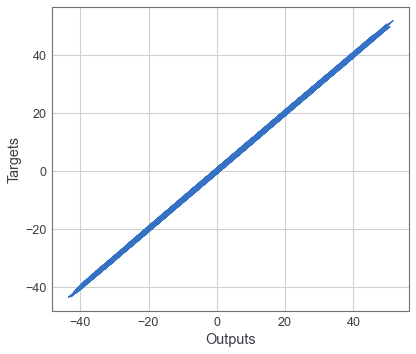

In [19]:
# import jtplot module in notebook
from jupyterthemes import jtplot
jtplot.style(theme='grade3')

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel("Outputs")
plt.ylabel("Targets")

plt.show()